# Script

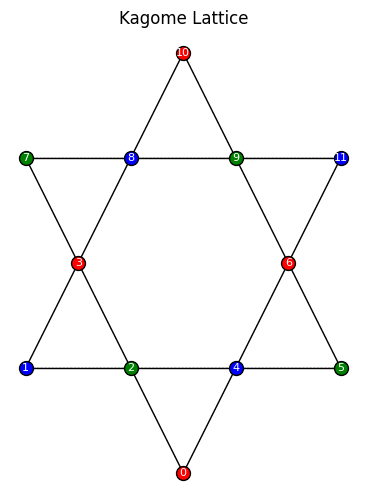

In [1]:
from main import *
row_layout = [{'num_cells': 1, 'shift': 0.0}, 
             {'num_cells': 2, 'shift': -0.5}, 
             {'num_cells': 3, 'shift': -1}]
sp = [0,1,9,11,16,17]
ham = interp_ham(row_layout, sp, 0.35 * np.pi)
ham.lattice.plot()

In [2]:
ge, gs = ground(ham)
ge

[mv 10] Est. Energy: -0.5583300057 (saved)
[mv 20] Est. Energy: -2.7898668003 (saved)
[mv 30] Est. Energy: -2.8790409382 (saved)
[mv 40] Est. Energy: -2.2225811610 (saved)
[mv 50] Est. Energy: -0.4571723610 (saved)
[mv 60] Est. Energy: -2.3915875414 (saved)
[mv 70] Est. Energy: -2.0302138918 (saved)
[mv 80] Est. Energy: -1.0615914919 (saved)
[mv 90] Est. Energy: -2.4153585678 (saved)
Final ground state and energy saved to ground_state_debug.pkl


np.float64(-3.2402151138885484)

# State prep

## 12 qubits

In [38]:
from main import *
from qaravan.core import brickwall_skeleton, two_local_circ
from qaravan.tensorQ import environment_state_prep

row_layout = [{'num_cells': 1, 'shift': 0.0}, 
             {'num_cells': 2, 'shift': -0.5}, 
             {'num_cells': 3, 'shift': -1}]
sp = [0,1,9,11,16,17]
ham = interp_ham(row_layout, sp, 0.35 * np.pi)

ge, gs = ground(ham, quiet=True)

In [ ]:
gates_per_layer = 5
num_instances = 5
best_cost = []
worst_cost = []
for num_layers in [4,8,12,16,20,24]:
    geom_skeleton = geometric_skeleton(ham.lattice, gates_per_layer, num_layers)
    cost_against_instance = []
    for _ in range(num_instances):
        circ, cost_list = environment_state_prep(geom_skeleton, gs, num_steps=1000, stop_ratio=1e-6, progress_interval=200)
        cost_against_instance.append(cost_list[-1])
    
    best_cost.append(1-max(cost_against_instance))
    worst_cost.append(1-min(cost_against_instance))

In [ ]:
plt.plot([4, 8, 12, 16, 20, 24], best_cost, label='Best cost')
plt.plot([4, 8, 12, 16, 20, 24], worst_cost, label='Worst cost')
plt.yscale('log')
plt.xlabel('Number of layers')
plt.ylabel('Cost')
plt.legend()

## 6 qubits

In [29]:
from main import *
from qaravan.core import brickwall_skeleton, two_local_circ
from qaravan.tensorQ import environment_state_prep

row_layout = [{'num_cells': 2, 'shift': -0.5}, 
             {'num_cells': 1, 'shift': 0.0}]
sp = [0,4,8]
ham = interp_ham(row_layout, sp, 0.35 * np.pi)
ge, gs = ground(ham, quiet=True)

In [30]:
geom_skeleton = geometric_skeleton(ham.lattice, 5, 2)
circ, cost_list = environment_state_prep(gs, skeleton=geom_skeleton, max_iter=500, stop_ratio=1e-6, progress_interval=200)

Step 0: cost = 0.1735873041475644
Plateau with cost 0.13700345613890064 at step 14


In [31]:
new_circ = circ + two_local_circ(geom_skeleton, mag=1e-2)
circ, cost_list = environment_state_prep(gs, circ=new_circ, max_iter=500, stop_ratio=1e-6, progress_interval=200)

Step 0: cost = 0.13626451569050957
Step 200: cost = 0.0005629710566097401
Step 400: cost = 0.0003910913763700563
Max iterations reached with cost 0.00034746906993543547


In [33]:
gates_per_layer = 5
num_instances = 5
best_cost = []
worst_cost = []
for num_layers in [4,8,12,16,20,24]:
    geom_skeleton = geometric_skeleton(ham.lattice, gates_per_layer, num_layers)
    cost_against_instance = []
    for _ in range(num_instances):
        circ, cost_list = environment_state_prep(geom_skeleton, gs, num_steps=500, stop_ratio=1e-6, progress_interval=200)
        cost_against_instance.append(cost_list[-1])
    
    best_cost.append(1-max(cost_against_instance))
    worst_cost.append(1-min(cost_against_instance))

Step 0: cost = 0.87436943588085
Step 200: cost = 0.9973449581117553
Step 400: cost = 0.9984880782770307
Maximum iteration reached with: 0.9986542243231469
Step 0: cost = 0.8920696980009468
Step 200: cost = 0.9975285470689521
Plateau with cost 0.9993156866053418 at step 378
Maximum iteration reached with: 0.9993156866053418
Step 0: cost = 0.878540117423454
Plateau with cost 0.9980490591442543 at step 178
Maximum iteration reached with: 0.9980490591442543
Step 0: cost = 0.9167317761895117
Step 200: cost = 0.9968064556645537
Plateau with cost 0.997131285907044 at step 325
Maximum iteration reached with: 0.997131285907044
Step 0: cost = 0.8886621832015331
Step 200: cost = 0.9958710101323328
Plateau with cost 0.9958898775036816 at step 216
Maximum iteration reached with: 0.9958898775036816
Step 0: cost = 0.9292274053459202
Plateau with cost 0.9999980558446608 at step 20
Maximum iteration reached with: 0.9999980558446608
Step 0: cost = 0.9276506371028448
Plateau with cost 0.9999969297466059 

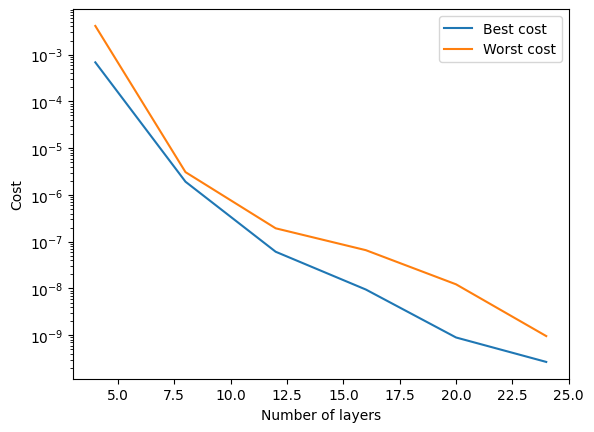

In [34]:
plt.plot([4, 8, 12, 16, 20, 24], best_cost, label='Best cost')
plt.plot([4, 8, 12, 16, 20, 24], worst_cost, label='Worst cost')
plt.yscale('log')
plt.xlabel('Number of layers')
plt.ylabel('Cost')
plt.legend()

## 24 qubits

In [3]:
from main import *

row_layout = [{'num_cells': 3, 'shift': 0.0}, 
             {'num_cells': 4, 'shift': -0.5}, 
             {'num_cells': 3, 'shift': 0.0}, 
             {'num_cells': 2, 'shift': 0.5}]
sp = [0,1,6,7,9,11,30,32,34,35,19,20]
ham = interp_ham(row_layout, sp, 0.35 * np.pi)

In [2]:
ge, gs = ground(ham, quiet=False, ncv=20)

Residual: 7.79e-01 for eigenvalue estimate: -5.754822
Residual: 6.66e-01 for eigenvalue estimate: -5.960018
Residual: 5.70e-01 for eigenvalue estimate: -6.107988
Residual: 4.90e-01 for eigenvalue estimate: -6.215886
Residual: 4.21e-01 for eigenvalue estimate: -6.294995
Residual: 3.64e-01 for eigenvalue estimate: -6.353382
Residual: 3.19e-01 for eigenvalue estimate: -6.397374
Residual: 2.81e-01 for eigenvalue estimate: -6.431309
Residual: 2.50e-01 for eigenvalue estimate: -6.457887
Residual: 2.25e-01 for eigenvalue estimate: -6.479057
Residual: 2.04e-01 for eigenvalue estimate: -6.496333
Residual: 1.86e-01 for eigenvalue estimate: -6.510640
Residual: 1.68e-01 for eigenvalue estimate: -6.522404
Residual: 1.68e-01 for eigenvalue estimate: -6.522404
Residual: 9.69e-02 for eigenvalue estimate: -6.527102
Residual: 7.49e-02 for eigenvalue estimate: -6.530860
Residual: 6.30e-02 for eigenvalue estimate: -6.534462
Residual: 5.52e-02 for eigenvalue estimate: -6.537969
Residual: 4.93e-02 for eigen

In [3]:
with open("gs24.pickle", 'wb') as f: 
    pickle.dump(gs, f)

In [4]:
A = [16, 17, 18]
B = [9, 10, 11]
C = [6, 7, 8]
top_entropy(gs, [A,B,C])

np.float64(-0.08470933343414444)

# 30 qubits

In [4]:
from main import * 

row_layout = [{'num_cells': 3, 'shift': 0.0}, 
             {'num_cells': 4, 'shift': -0.5}, 
             {'num_cells': 3, 'shift': 0.0}, 
             {'num_cells': 2, 'shift': 0.5}]
sp = [0,7,9,19,32,35]
ham = interp_ham(row_layout, sp, 0.35 * np.pi)

In [6]:
len(edge_matching(ham.lattice.nn_pairs, 5))

10

# TEE is non-zero for 1D models

In [ ]:
from qaravan.core import * 
from qaravan.tensorQ import * 

In [4]:
ham = XY(8)
_, gstate = ham.ground()

A = [0,1]
B = [2,3,4]
C = [5,6]
regions = [A, B, C]
print(top_entropy(gstate, regions))

0.029132153208173528


# Progress report

In [4]:
from main import *
row_layout = [{'num_cells': 1, 'shift': 0.0}, 
             {'num_cells': 2, 'shift': -0.5}, 
             {'num_cells': 3, 'shift': -1}]
sp = []
ham = interp_ham(row_layout, sp, 0.35 * np.pi)

ge, gs = ground(ham, ncv=10)
ge

Residual: 1.01e+00 for eigenvalue estimate: -3.273642
Residual: 8.76e-01 for eigenvalue estimate: -3.778566
Residual: 7.70e-01 for eigenvalue estimate: -4.142414
Residual: 6.62e-01 for eigenvalue estimate: -4.412025
Residual: 5.40e-01 for eigenvalue estimate: -4.598694
Residual: 4.09e-01 for eigenvalue estimate: -4.714214
Residual: 3.07e-01 for eigenvalue estimate: -4.778371
Residual: 3.07e-01 for eigenvalue estimate: -4.778371
Residual: 1.80e-01 for eigenvalue estimate: -4.799740
Residual: 1.41e-01 for eigenvalue estimate: -4.817403
Residual: 1.18e-01 for eigenvalue estimate: -4.834453
Residual: 1.01e-01 for eigenvalue estimate: -4.850169
Residual: 1.18e-01 for eigenvalue estimate: -4.872569
Residual: 9.00e-02 for eigenvalue estimate: -4.876738
Residual: 7.53e-02 for eigenvalue estimate: -4.883041
Residual: 6.54e-02 for eigenvalue estimate: -4.888810
Residual: 5.88e-02 for eigenvalue estimate: -4.894626
Residual: 5.25e-02 for eigenvalue estimate: -4.900867
Residual: 4.86e-02 for eigen

np.float64(-4.945673773302447)

# Thin strip, periodic y

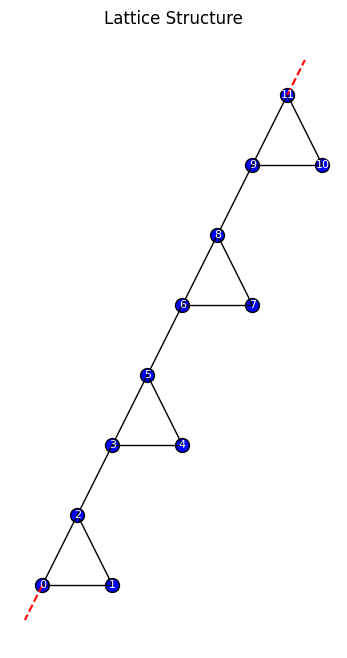

In [217]:
afm_ham = interp_ham(2, 8, 0)
half_ham = interp_ham(2, 8, 0.35 * np.pi)
csl_ham = interp_ham(2, 8, np.pi/2)

csl_ham.lattice.plot()

In [218]:
energy_a, gstate_a = afm_ham.ground()
energy_h, gstate_h = half_ham.ground()
energy_c, gstate_c = csl_ham.ground()

In [219]:
A = [0,1,2]
B = [3,4,5]
C = [6,7,8]

tee_a = top_entropy(gstate_a, [A,B,C])
tee_h = top_entropy(gstate_h, [A,B,C])
tee_c = top_entropy(gstate_c, [A,B,C])

print("At theta = 0, topological entropy = ", tee_a, " and quantum dimensions is ", np.exp(-tee_a))
print("At theta = 0.35 pi, topological entropy = ", tee_h, " and quantum dimensions is ", np.exp(-tee_h))
print("At theta = pi/2, topological entropy = ", tee_c, " and quantum dimensions is ", np.exp(-tee_c))

At theta = 0, topological entropy =  -0.11847910900454695  and quantum dimensions is  1.1257833551213658
At theta = 0.35 pi, topological entropy =  -7.55045678694638e-05  and quantum dimensions is  1.0000755074184111
At theta = pi/2, topological entropy =  1.864158181722055e-15  and quantum dimensions is  0.9999999999999981


# 2D lattice 

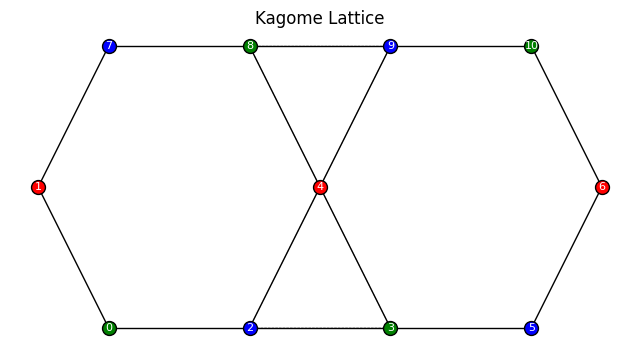

In [3]:
row_layout = [{'num_cells': 3, 'shift': 0.0}, 
             {'num_cells': 2, 'shift': 0.5}]
sp = [0,7,11,14]
ham = interp_ham(row_layout, sp, 0.35 * np.pi)
ham.lattice.plot()

In [5]:
ge, gs = ham.ground()

In [6]:
ge

array([-2.51160724])

In [17]:
len(ham.lattice.nn_pairs)

14

In [14]:
ham.lattice.triangle_terms

{(2, 3, 4), (4, 9, 8)}

In [16]:
ham.terms[40]

(np.float64(0.4539904997395468), (4, 8), ['z', 'z'])

In [18]:
len(ham.terms), 14*3 + 12

(54, 54)

In [5]:
ge 

array([-12.15657315])

In [4]:
energy_a, gstate_a = afm_ham.ground()
energy_h, gstate_h = half_ham.ground()
energy_c, gstate_c = csl_ham.ground()

In [5]:
A = [0,1,2]
B = [3,4,5]
C = [6,7,8]

tee_a = top_entropy(gstate_a, [A,B,C])
tee_h = top_entropy(gstate_h, [A,B,C])
tee_c = top_entropy(gstate_c, [A,B,C])

print("At theta = 0, topological entropy = ", tee_a, " and quantum dimensions is ", np.exp(-tee_a))
print("At theta = 0.35 pi, topological entropy = ", tee_h, " and quantum dimensions is ", np.exp(-tee_h))
print("At theta = pi/2, topological entropy = ", tee_c, " and quantum dimensions is ", np.exp(-tee_c))

At theta = 0, topological entropy =  -0.13144561856915726  and quantum dimensions is  1.1404758853254675
At theta = 0.35 pi, topological entropy =  -0.5038964667736064  and quantum dimensions is  1.6551579904388816
At theta = pi/2, topological entropy =  -0.2930568616631657  and quantum dimensions is  1.3405190124051574


In [2]:
import numpy as np
tee = -0.35677694103454805
print("At theta = 0.35 pi, topological entropy = ", tee, " and quantum dimensions is ", np.exp(-tee))

At theta = 0.35 pi, topological entropy =  -0.35677694103454805  and quantum dimensions is  1.4287171461395662
